In [407]:
import math
import random
import matplotlib.pyplot as plt

In [408]:
def transpose(x):
    return [*map(list,zip(*x))]

def tensor(x,y):
    return [[row*col for col in y] for row in x]

def vecPlus(x,y):
    return [a+b for a,b in zip(x,y)]

def vecMin(x,y):
    return [a-b for a,b in zip(x,y)]
    
def vecProd(x,y):
    return [a*b for a,b in zip(x,y)]
    
def vecDiv(x,y):
    return [a/b for a,b in zip(x,y)]

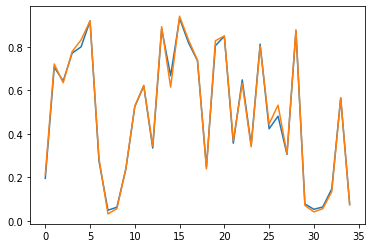

In [638]:
def sigmoid(x):
    return [math.exp(y)/(math.exp(y)+1) for y in x]

def sigmoidDiff(x):
    return [math.exp(y)/(math.exp(y)+1)**2 for y in x]

def err(actual, pred):
    return vecProd(vecMin(sigmoid(pred),actual),[math.log(p) for p in sigmoid(pred)])

def errDiff(actual, pred):
    e_s = vecDiv(vecProd(vecMin(sigmoid(pred),actual),sigmoid(pred)),sigmoid(pred))
    s_o = sigmoidDiff(pred)
    e_o = vecProd(e_s,s_o)
    return tensor(inp,e_o)

def feed(inputs, weights):
    return [sum(vecProd(inputs,row)) for row in transpose(weights)]

def target(x):
    return [random.choices([0,1], k=1, weights=[1-y,y])[0] for y in x]

def optimize(weights,targets,inputs,learningRate):
    return [[a-b*learningRate for a,b in zip(w,j)] for w,j in zip(weights,errDiff(targets,feed(inputs,weights)))]

inp = [1.0 for _ in range(1)]
outputs = 35
targ = [random.random() for _ in range(outputs)]
wgt = [[(a+b)*0.01 for b in range(outputs)] for a in range(len(inp))]
lr = 0.1

for _ in range(5000):
    wgt = optimize(wgt,target(targ),inp,lr)
results = transpose([sigmoid(feed(inp,wgt)),targ])
plt.plot(results)